# lab_results_test_time.ipynb
Author: UFO Software, LLC<br>
Created: Thursday, February 18, 2021 12:16<br>

License GPLv3+: GNU GPL version 3 or later <https://gnu.org/licenses/gpl.html> <br>
This is free software: you are free to change and redistribute it.<br>
There is NO WARRANTY, to the extent permitted by law.<br>
<br>
Reads in the LabResults_0.csv file from the [December 2020 WA State Traceability Data](https://lcb.app.box.com/s/fnku9nr22dhx04f6o646xv6ad6fswfy9?page=1) and drops the columns that have been depreciated.  The notebook attempts to find patterns for cannabis lab test times.

# Lab Test Times
When Cannabis was first legalized, I read a number of articles where producers complained about the lack of testing labs and the time it took to test their product.  In this notebook I attempt to find the average testing time and if testing times have changed over time.

In [63]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.ticker as ticker


file_path = Path('../dec-2020') #replace with the path of where your data is stored
pd.set_option('display.max_columns', None)

# Load The Data
and parse the date columns

In [64]:
date_cols = ['created_at',
             'deleted_at',
             'updated_at',
             'tested_at',
             'received_at']
lab_results_df = pd.read_csv(file_path / 'LabResults_0.csv', sep = '\t', encoding = 'utf-16', parse_dates = date_cols)
lab_results_df.head()

/Users/alienfoo/anaconda3/envs/cds_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (4,12,13,14,47,70,79,82,83,88,89,113,119,182) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,for_mme_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,received_at,type,foreign_matter,moisture_content_percent,herbicides_ppm,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_thcv_percent,cannabinoid_thcv_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbdv_mg_g,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,cannabinoid_cbga_percent,cannabinoid_cbga_mg_g,cannabinoid_cbc_percent,cannabinoid_cbc_mg_g,cannabinoid_cbn_percent,cannabinoid_cbn_mg_g,terpenoid_status,terpenoid_editor,terpenoid_bisabolol_percent,terpenoid_bisabolol_mg_g,terpenoid_humulene_percent,terpenoid_humulene_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,terpenoid_terpinolene_percent,terpenoid_terpinolene_mg_g,terpenoid_b_caryophyllene_percent,terpenoid_b_caryophyllene_mg_g,terpenoid_b_myrcene_percent,terpenoid_b_myrcene_mg_g,terpenoid_b_pinene_percent,terpenoid_b_pinene_mg_g,terpenoid_caryophyllene_oxide_percent,terpenoid_caryophyllene_oxide_mg_g,terpenoid_limonene_percent,terpenoid_limonene_mg_g,terpenoid_linalool_percent,terpenoid_linalool_mg_g,microbial_status,microbial_editor,microbial_total_viable_plate_count_cfu_g,microbial_total_yeast_mold_cfu_g,microbial_total_coliform_cfu_g,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,microbial_aerobic_bacteria_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_bifentrin_ppm,pesticide_captan_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_dimethomorph_ppm,pesticide_etoxazole_ppm,pesticide_fenhexamid_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_pcnb_ppm,pesticide_piperonyl_butoxide_ppm,pesticide_pyrethrin_ppm,pesticide_spinetoram_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,solvent_heptanes_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotet

In [65]:
lab_results_df.tail()

,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,for_mme_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,received_at,type,foreign_matter,moisture_content_percent,herbicides_ppm,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_thcv_percent,cannabinoid_thcv_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbdv_mg_g,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,cannabinoid_cbga_percent,cannabinoid_cbga_mg_g,cannabinoid_cbc_percent,cannabinoid_cbc_mg_g,cannabinoid_cbn_percent,cannabinoid_cbn_mg_g,terpenoid_status,terpenoid_editor,terpenoid_bisabolol_percent,terpenoid_bisabolol_mg_g,terpenoid_humulene_percent,terpenoid_humulene_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,terpenoid_terpinolene_percent,terpenoid_terpinolene_mg_g,terpenoid_b_caryophyllene_percent,terpenoid_b_caryophyllene_mg_g,terpenoid_b_myrcene_percent,terpenoid_b_myrcene_mg_g,terpenoid_b_pinene_percent,terpenoid_b_pinene_mg_g,terpenoid_caryophyllene_oxide_percent,terpenoid_caryophyllene_oxide_mg_g,terpenoid_limonene_percent,terpenoid_limonene_mg_g,terpenoid_linalool_percent,terpenoid_linalool_mg_g,microbial_status,microbial_editor,microbial_total_viable_plate_count_cfu_g,microbial_total_yeast_mold_cfu_g,microbial_total_coliform_cfu_g,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,microbial_aerobic_bacteria_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_bifentrin_ppm,pesticide_captan_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_dimethomorph_ppm,pesticide_etoxazole_ppm,pesticide_fenhexamid_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_pcnb_ppm,pesticide_piperonyl_butoxide_ppm,pesticide_pyrethrin_ppm,pesticide_spinetoram_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,solvent_heptanes_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotet

In [66]:
lab_results_df[(lab_results_df.tested_at == pd.Timestamp(1900, 1, 1))]

,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,for_mme_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,received_at,type,foreign_matter,moisture_content_percent,herbicides_ppm,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_thcv_percent,cannabinoid_thcv_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbdv_mg_g,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,cannabinoid_cbga_percent,cannabinoid_cbga_mg_g,cannabinoid_cbc_percent,cannabinoid_cbc_mg_g,cannabinoid_cbn_percent,cannabinoid_cbn_mg_g,terpenoid_status,terpenoid_editor,terpenoid_bisabolol_percent,terpenoid_bisabolol_mg_g,terpenoid_humulene_percent,terpenoid_humulene_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,terpenoid_terpinolene_percent,terpenoid_terpinolene_mg_g,terpenoid_b_caryophyllene_percent,terpenoid_b_caryophyllene_mg_g,terpenoid_b_myrcene_percent,terpenoid_b_myrcene_mg_g,terpenoid_b_pinene_percent,terpenoid_b_pinene_mg_g,terpenoid_caryophyllene_oxide_percent,terpenoid_caryophyllene_oxide_mg_g,terpenoid_limonene_percent,terpenoid_limonene_mg_g,terpenoid_linalool_percent,terpenoid_linalool_mg_g,microbial_status,microbial_editor,microbial_total_viable_plate_count_cfu_g,microbial_total_yeast_mold_cfu_g,microbial_total_coliform_cfu_g,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,microbial_aerobic_bacteria_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_bifentrin_ppm,pesticide_captan_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_dimethomorph_ppm,pesticide_etoxazole_ppm,pesticide_fenhexamid_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_pcnb_ppm,pesticide_piperonyl_butoxide_ppm,pesticide_pyrethrin_ppm,pesticide_spinetoram_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,solvent_heptanes_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotet

# Drop the depreciated columns

In [67]:
decpreciated_cols = ['cannabinoid_cbc_mg_g',
                     'cannabinoid_cbc_percent',
                     'cannabinoid_cbdv_mg_g',
                     'cannabinoid_cbga_mg_g',
                     'cannabinoid_cbga_percent',
                     'cannabinoid_cbn_mg_g',
                     'cannabinoid_cbn_percent',
                     'cannabinoid_thcv_mg_g',
                     'cannabinoid_thcv_percent',
                     'global_for_inventory_id',
                     'for_mme_id',
                     'herbicides_ppm',
                     'high_cbd_flag',
                     'high_thc_flag',
                     'microbial_aerobic_bacteria_cfu_g',
                     'microbial_total_coliform_cfu_g',
                     'microbial_total_viable_plate_count_cfu_g',
                     'microbial_total_yeast_mold_cfu_g',
                     'pesticide_bifentrin_ppm',
                     'pesticide_captan_ppm',
                     'pesticide_dimethomorph_ppm',
                     'pesticide_fenhexamid_ppm',
                     'pesticide_pcnb_ppm',
                     'pesticide_piperonyl_butoxide_ppm',
                     'pesticide_pyrethrin_ppm',
                     'pesticide_spinetoram_ppm',
                     'received_at',
                     'solvent_heptanes_ppm',
                     'terpenoid_b_caryophyllene_mg_g',
                     'terpenoid_b_caryophyllene_percent',
                     'terpenoid_b_myrcene_mg_g',
                     'terpenoid_b_myrcene_percent',
                     'terpenoid_b_pinene_mg_g',
                     'terpenoid_b_pinene_percent',
                     'terpenoid_bisabolol_mg_g',
                     'terpenoid_bisabolol_percent',
                     'terpenoid_caryophyllene_oxide_mg_g',
                     'terpenoid_caryophyllene_oxide_percent',
                     'terpenoid_editor',
                     'terpenoid_humulene_mg_g',
                     'terpenoid_humulene_percent',
                     'terpenoid_limonene_mg_g',
                     'terpenoid_limonene_percent',
                     'terpenoid_linalool_mg_g',
                     'terpenoid_linalool_percent',
                     'terpenoid_b_pinene_mg_g',
                     'terpenoid_b_pinene_percent',
                     'terpenoid_status',
                     'terpenoid_terpinolene_mg_g',
                     'terpenoid_terpinolene_percent']
                     
                     
lab_results_df.drop(labels = decpreciated_cols, axis = 1, inplace = True)

In [68]:
lab_results_df

,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,type,foreign_matter,moisture_content_percent,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,microbial_status,microbial_editor,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_etoxazole_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotetramat_ppm,pesticide_spiroxamine_ppm,pesticide_tebuconazole_ppm,pesticide_thiacloprid_ppm,foreign_matter_stems,foreign_matter_seeds,test_for_terpenes
0,NaN,2018-01-31 22:34:19,WAWA1.MMCY,WAWA1.US29D,5275985106676286.0,NaT,WAJ412964.INCP,2018-01-31 22:34:19,not tested,completed,WAJ412964.BA1JS,NaN,NaN,NaN,WAWA1.US29D,2016-04-22 02:30:00,intermediate_product,False,0.0,0.0,completed,NaN,75.60,NaN,6.80,NaN,0.0,NaN,2.90,NaN,0.00,NaN,NaN,0.0,NaN,NaN,NaN,completed,WAWA1.US1,0.0,0.0,NaN,completed,WAWA1.US1,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,completed,WAWA1.US1,0.0,0.0,0.0,NaN,76.000,hydrocarbon_concentrate,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
1,WAJ412964.LR2,2018-01-31 22:36:20,WAWA1.MMCY,WAWA1.US29D,4129640000001061.0,NaT,WAJ412964.ING1,2018-01-31 22:36:20,passed,completed,WAJ412964.BA1LC,NaN,NaN,NaN,WAWA1.US29D,2017-11-13 00:36:00,harvest_materials,False,4.9,0.

In [69]:
full_dataset_len = len(lab_results_df.index)
full_dataset_len

1993093

In [70]:
lab_results_df[(lab_results_df.tested_at == pd.Timestamp(1900, 1, 1))]

,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,type,foreign_matter,moisture_content_percent,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,microbial_status,microbial_editor,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_etoxazole_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotetramat_ppm,pesticide_spiroxamine_ppm,pesticide_tebuconazole_ppm,pesticide_thiacloprid_ppm,foreign_matter_stems,foreign_matter_seeds,test_for_terpenes
858,WAJ413090.LRNV,2018-02-01 05:01:06,WAWA1.MMQP,WAWA1.USQN,NaN,NaT,WAJ413090.INNTR,2018-02-01 05:01:06,passed,completed,WAJ413090.BA17FS,NaN,NaN,NaN,WAWA1.USQN,1900-01-01,end_product,False,0.00,0.0,completed,1.0,0.0,0.0,0.00,0.0,NaN,NaN,0.0,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,completed,WAWA1.US1,0.0,0.0,0.0,completed,WAWA1.US1,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,completed,WAWA1.US1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,usable_marijuana,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
15031,WAJ416694.LRBLL,2018-02-03 03:53:36,WAWA1.MMWV,WAWA1.US18I,NaN,NaT,WAJ416694.INF9H,2018-02-03 03:53:36,passed,completed,WAJ416694.BAVT9,NaN,NaN,NaN,WAWA1.US18I,1900-01-01,intermediate_product,False,0.00,0.0,completed,1.0,0.0,0.0,0.00,0.0,NaN,NaN,0.0,NaN

In [71]:
lab_results_df[(lab_results_df.tested_at.dt.date < lab_results_df.created_at.dt.date) & (lab_results_df.tested_at == pd.Timestamp(1900, 1, 1))]

,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,type,foreign_matter,moisture_content_percent,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,microbial_status,microbial_editor,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_etoxazole_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotetramat_ppm,pesticide_spiroxamine_ppm,pesticide_tebuconazole_ppm,pesticide_thiacloprid_ppm,foreign_matter_stems,foreign_matter_seeds,test_for_terpenes
858,WAJ413090.LRNV,2018-02-01 05:01:06,WAWA1.MMQP,WAWA1.USQN,NaN,NaT,WAJ413090.INNTR,2018-02-01 05:01:06,passed,completed,WAJ413090.BA17FS,NaN,NaN,NaN,WAWA1.USQN,1900-01-01,end_product,False,0.00,0.0,completed,1.0,0.0,0.0,0.00,0.0,NaN,NaN,0.0,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,completed,WAWA1.US1,0.0,0.0,0.0,completed,WAWA1.US1,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,completed,WAWA1.US1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,usable_marijuana,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
15031,WAJ416694.LRBLL,2018-02-03 03:53:36,WAWA1.MMWV,WAWA1.US18I,NaN,NaT,WAJ416694.INF9H,2018-02-03 03:53:36,passed,completed,WAJ416694.BAVT9,NaN,NaN,NaN,WAWA1.US18I,1900-01-01,intermediate_product,False,0.00,0.0,completed,1.0,0.0,0.0,0.00,0.0,NaN,NaN,0.0,NaN

In [72]:
lab_results_df['update_time'] = lab_results_df.updated_at - lab_results_df.created_at
lab_results_df['update_time'] = lab_results_df['update_time'].dt.round('1D').dt.days

In [73]:
lab_results_df['update_time'].describe()

count    1.993093e+06
mean     7.154043e+00
std      5.382986e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.390000e+02
Name: update_time, dtype: float64

In [74]:
lab_results_df['update_time'].unique()

array([  0,   1,  54,  34,  90,   7,  12,  25,   6,  13,   5,  39,   8,
        19,  40,  61,  67,  53,  15,  27,   4,  77,  58,  18, 110, 134,
        55,  21,  26, 192, 127, 132,  97,  43,  11,  85,  62,  96,  50,
        28,  33,  14,  84,  32,  22, 148, 151, 152,  47,  99, 147,  82,
        60, 168, 137,  49, 109,  42,  74,  10,  95,  20,  70,  36, 162,
        48,  35,  91, 124, 149,  37,  93, 201,   2,  41,  76, 138, 104,
        88, 533,  89, 146, 133, 123, 346, 348, 197,  68,  71, 112,  57,
        59, 102, 186,   3, 165, 174,  31,  98,  63, 121,  16, 196, 156,
       187, 193, 130, 144, 164, 194, 119, 113,  24, 125,  46,  81, 116,
       131, 200, 166, 173, 100, 154,  66,  78,  64, 103,  72, 126, 188,
       153,  38, 157,  44,  17, 122, 145, 185, 181,  69,  73, 170,  51,
       532,  94,  75, 178, 198,  83,  23, 177,  52,   9,  45,  30, 163,
       101, 114,  29, 160, 159,  79, 108, 180, 141, 530, 235, 189, 120,
       107, 115, 136, 190,  87,  80, 529, 528,  56, 169, 118, 52

In [75]:
lab_results_df['update_time'].value_counts()

0      1940848
1         3708
2         2842
3         2108
4         1588
        ...   
544          1
537          1
535          1
525          1
739          1
Name: update_time, Length: 541, dtype: int64

# Function Definitions

In [76]:
# Round the data to days
def round_to_days(df):
    df['days'] = df.testing_time.dt.round('1D').dt.days

In [77]:
def plot_results(df):
    sns.set_style('white')
    fig, axes = plt.subplots(ncols=3, figsize=(30,15), sharey=False);
    
    a0 = axes[0]
    #a0.set(xlabel = 'Marijuana')
    bp = sns.boxplot(y = 'days', data=df, ax = a0);
    
    a1 = axes[1]
    #a1.set(xlabel='Intermediate Product')
    hist = sns.histplot(data = df.days, binwidth=1, ax = a1);
    
    a2 = axes[2]
    #a2.set(xlabel='Harvest Materials')
    sp = sns.scatterplot(data = df, x = 'created_at', y = "days", ax = a2);
    
    sns.despine(left=True, right=True, top=True, bottom=True)


def plot_results(df):
    fig, axes = plt.subplots(2, 2, figsize = (20, 20))
    plt.suptitle('Days To Test')
    ax = axes[0,0]
    ax.set_xlabel('Days')
    ax.set(frame_on = False)
    df.hist(ax = ax, column = 'days', grid = False)
    ax.set_title('')
    ax = axes[0,1]
    ax.set(frame_on = False)
    df.boxplot(ax = axes[0,1], column = 'days', grid = False)
    ax = axes[1,0]
    ax.set(frame_on = False)
    df.plot.line(ax = axes[1,0], x = 'created_at', y = "days")
    ax = axes[1,1]
    ax.set(frame_on = False)
    df.plot.scatter(ax = axes[1,1], x = 'created_at', y = 'days')
   

Calculate statistics for a slice of the data.  Store it for comparisson.

In [78]:
stats_df = pd.DataFrame(columns = ['key', 'count', 'median', 'mean', 'min', 'Q1', 'Q2', 'Q3', 'IQR', 'max', 'kurtosis', 'skew'])
def calculate_stats(data, stats, key):
    stats = stats.append({'key': key,
                     'count': data.days.count(),
                     'median': data.days.median(),
                     'mean': data.days.mean(),
                     'min': data.days.min(),
                     'Q1': data.days.quantile(0.25),
                     'Q2': data.days.quantile(0.5),
                     'Q3': data.days.quantile(0.75),
                     'IQR': data.days.quantile(0.75) - data.days.quantile(0.25),
                     'max': data.days.max(),
                     'kurtosis': data.days.kurt(),
                     'skew': data.days.skew()},
                      ignore_index=True )
    return stats

# Can we use the created at field as the received at time?
Many of the created at times are after the testing time so we will only use the rows where created at is before tested at.
This assumes that the record was created at the time that the sample was recieved which may not be the case.

In [79]:
testing_times_df = lab_results_df[(lab_results_df.tested_at != pd.Timestamp(1900, 1, 1)) & (lab_results_df.tested_at.dt.date >= lab_results_df.created_at.dt.date)].copy()

In [80]:
testing_times_df

,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,type,foreign_matter,moisture_content_percent,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,microbial_status,microbial_editor,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_etoxazole_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotetramat_ppm,pesticide_spiroxamine_ppm,pesticide_tebuconazole_ppm,pesticide_thiacloprid_ppm,foreign_matter_stems,foreign_matter_seeds,test_for_terpenes,update_time
741,WAJ413090.LRKM,2018-02-01 03:44:14,WAWA1.MMQP,WAWA1.USQN,4165100000002755.0,NaT,WAJ413090.INNZB,2018-02-02 04:00:20,passed,completed,WAJ413090.BA17I6,NaN,NaN,NaN,WAWA1.USQN,2018-02-01 03:43:00,intermediate_product,False,0.00,0.0,completed,NaN,25.70,NaN,40.23,NaN,0.0,NaN,0.00,NaN,0.14,NaN,NaN,0.0,NaN,NaN,NaN,completed,WAWA1.US1,0.0,0.0,NaN,completed,WAWA1.US1,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,62.8920,flower,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,1
742,WAJ413090.LRKN,2018-02-01 03:44:14,WAWA1.MMQP,WAWA1.USQN,4165100000000100.0,NaT,WAJ413090.INNZD,2018-02-02 04:00:21,passed,completed,WAJ413090.BA17I9,NaN,NaN,NaN,WAWA1.USQN,2018-02-01 03:43:00,intermediate_product,False,0.0

# Calculate the testing time
Calculate the testing time by subtracting the created at time from the tested at time

In [81]:
testing_times_df['testing_time'] = lab_results_df.tested_at - lab_results_df.created_at
round_to_days(testing_times_df)

In [82]:
testing_times_df

,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,type,foreign_matter,moisture_content_percent,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,microbial_status,microbial_editor,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_etoxazole_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotetramat_ppm,pesticide_spiroxamine_ppm,pesticide_tebuconazole_ppm,pesticide_thiacloprid_ppm,foreign_matter_stems,foreign_matter_seeds,test_for_terpenes,update_time,testing_time,days
741,WAJ413090.LRKM,2018-02-01 03:44:14,WAWA1.MMQP,WAWA1.USQN,4165100000002755.0,NaT,WAJ413090.INNZB,2018-02-02 04:00:20,passed,completed,WAJ413090.BA17I6,NaN,NaN,NaN,WAWA1.USQN,2018-02-01 03:43:00,intermediate_product,False,0.00,0.0,completed,NaN,25.70,NaN,40.23,NaN,0.0,NaN,0.00,NaN,0.14,NaN,NaN,0.0,NaN,NaN,NaN,completed,WAWA1.US1,0.0,0.0,NaN,completed,WAWA1.US1,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,62.8920,flower,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,1,-1 days +23:58:46,0
742,WAJ413090.LRKN,2018-02-01 03:44:14,WAWA1.MMQP,WAWA1.USQN,4165100000000100.0,NaT,WAJ413090.INNZD,2018-02-02 04:00:21,passed,completed,WAJ413090.BA17I9,NaN,NaN,NaN,WAWA1.USQN,2018-02-01 0

# Inspect The Data
Clearly there are a number of outliers.

In [83]:
stats_df = calculate_stats(testing_times_df, stats_df, 'None')
stats_df

,key,count,median,mean,min,Q1,Q2,Q3,IQR,max,kurtosis,skew
0,None,1603058,0.0,0.031547,-1,0.0,0.0,0.0,0.0,2180,217832.330977,415.315781


In [84]:
testing_times_df['days'].describe()

count    1.603058e+06
mean     3.154658e-02
std      4.015505e+00
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.180000e+03
Name: days, dtype: float64

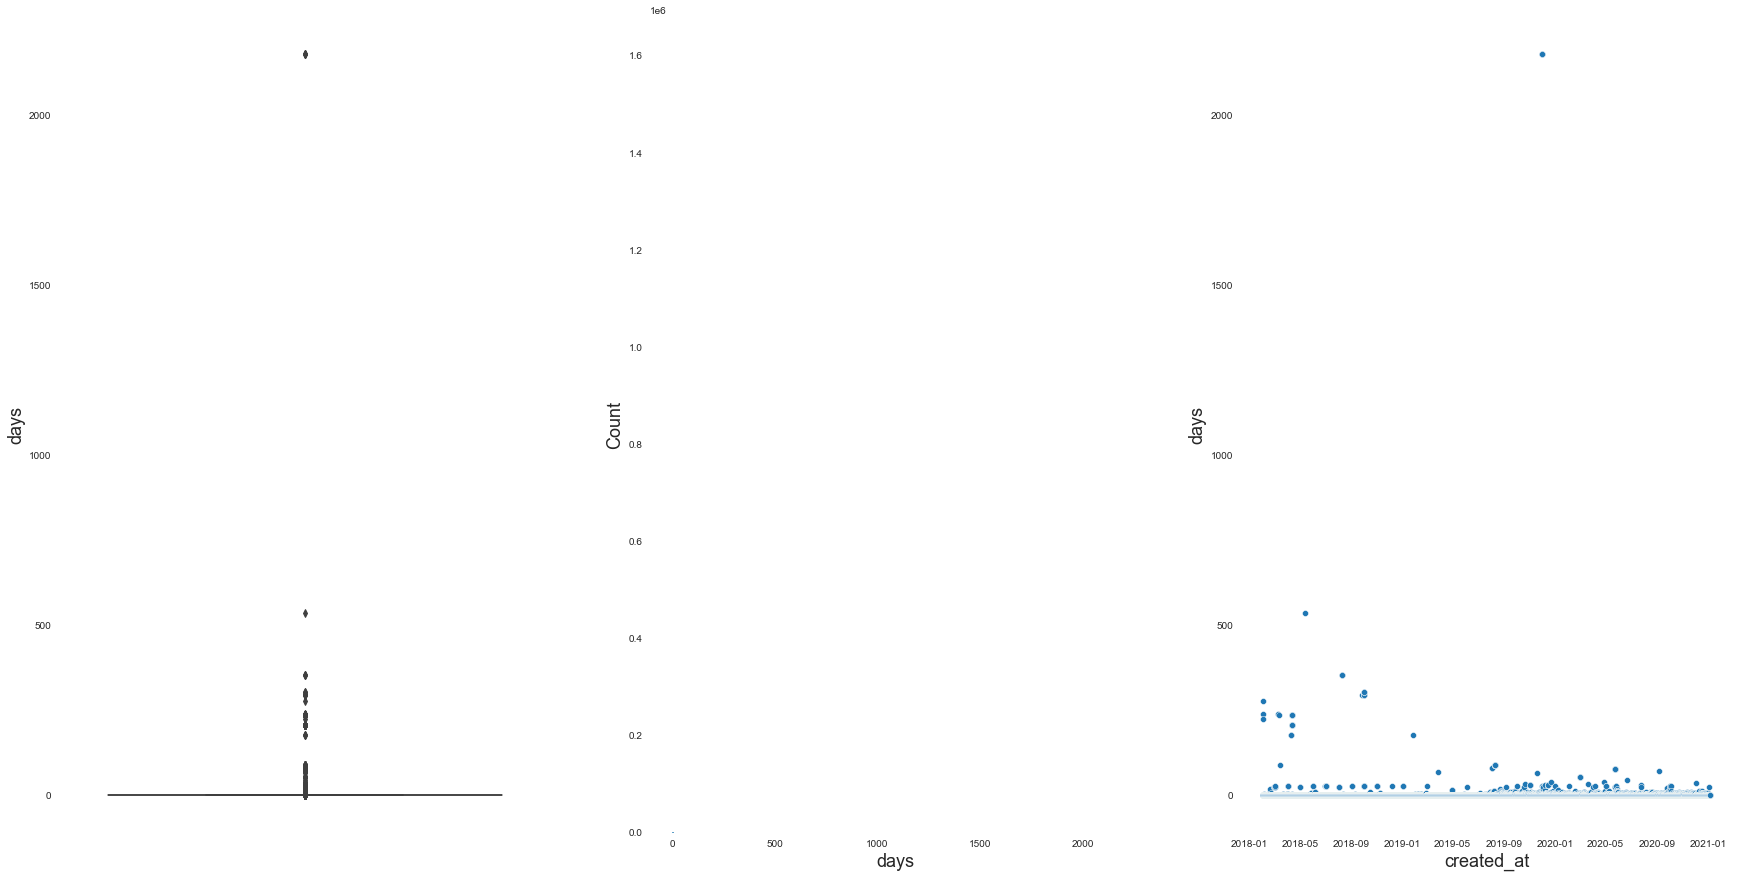

In [85]:
plot_results(testing_times_df)

# Remove The Outliers
A timeframe of 2180 days is almost 6 years which is clearly not correct but what is the best cutoff point?

# Cutoff at 90 Days
Is it reasonable for a lab to take 3 months to perform testing?

In [86]:
valid_testing_times_df = testing_times_df[testing_times_df['days'] <= 90].copy()

In [87]:
valid_testing_times_df.reset_index(inplace = True)

In [88]:
stats_df = calculate_stats(valid_testing_times_df, stats_df, '90')
stats_df

,key,count,median,mean,min,Q1,Q2,Q3,IQR,max,kurtosis,skew
0,None,1603058,0.0,0.031547,-1,0.0,0.0,0.0,0.0,2180,217832.330977,415.315781
1,90,1602942,0.0,0.009614,-1,0.0,0.0,0.0,0.0,90,17595.446461,120.211353


In [89]:
valid_testing_times_df.days.describe()

count    1.602942e+06
mean     9.614197e-03
std      5.006481e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.000000e+01
Name: days, dtype: float64

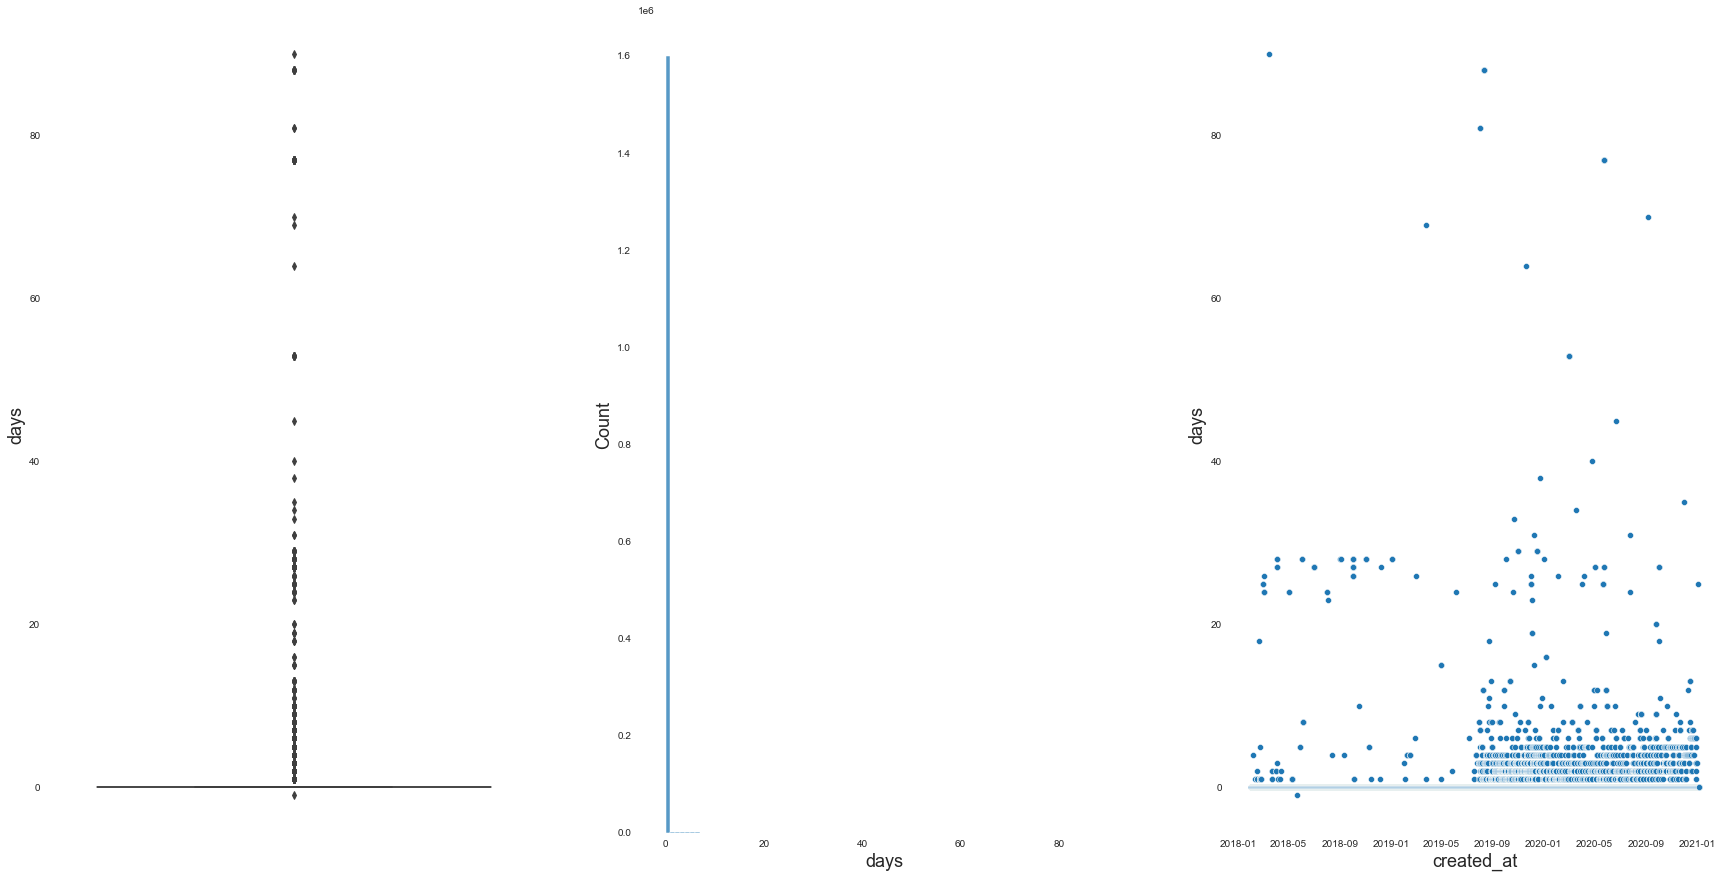

In [90]:
plot_results(valid_testing_times_df)

# Cutoff at 30 Days
Based on the 90 day cutoff, it looks like a 30 day cutoff will eliminate most of the outliers.
Is it reasonable for a lab to take one month to perform testing?

In [91]:
valid_testing_times_df = testing_times_df[testing_times_df['days'] <= 30].copy()

In [92]:
valid_testing_times_df.reset_index(inplace = True)

In [93]:
stats_df = calculate_stats(valid_testing_times_df, stats_df, '30')
stats_df

,key,count,median,mean,min,Q1,Q2,Q3,IQR,max,kurtosis,skew
0,None,1603058,0.0,0.031547,-1,0.0,0.0,0.0,0.0,2180,217832.330977,415.315781
1,90,1602942,0.0,0.009614,-1,0.0,0.0,0.0,0.0,90,17595.446461,120.211353
2,30,1602885,0.0,0.007167,-1,0.0,0.0,0.0,0.0,29,6868.144206,74.250853


In [94]:
valid_testing_times_df['days'].describe()

count    1.602885e+06
mean     7.167077e-03
std      2.672752e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.900000e+01
Name: days, dtype: float64

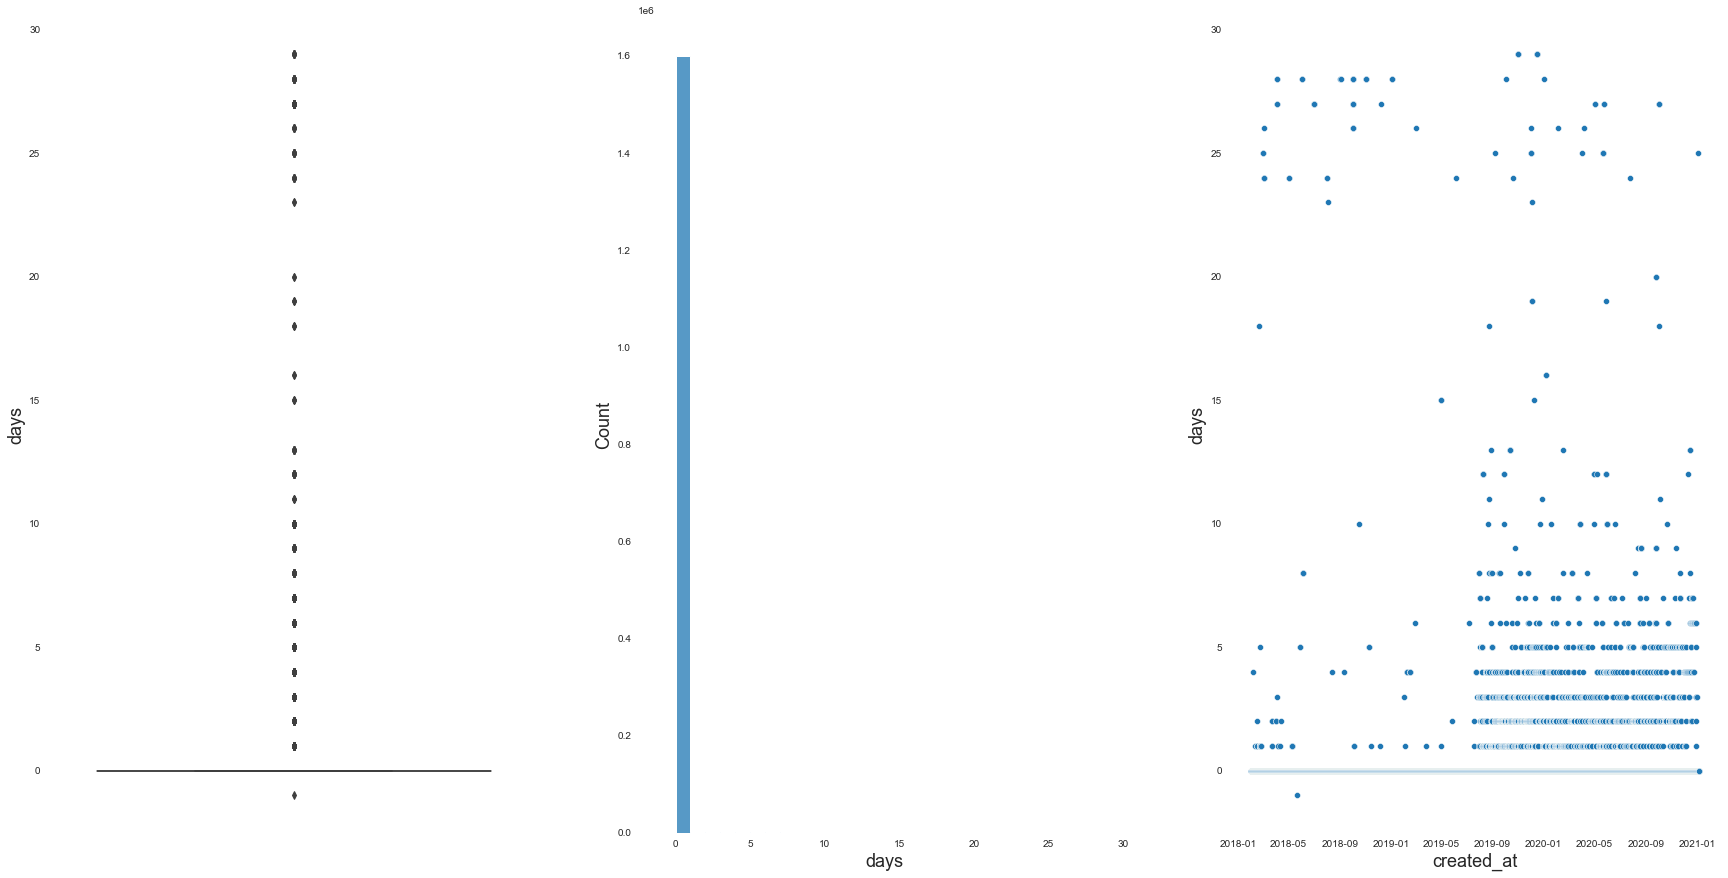

In [95]:
plot_results(valid_testing_times_df)

# Comparison
Assuming that the at date is the date that the sample was received, then removing the outliers has no effect on the median, min, 25th, 50th and 75th percentile.

In [96]:
stats_df

,key,count,median,mean,min,Q1,Q2,Q3,IQR,max,kurtosis,skew
0,None,1603058,0.0,0.031547,-1,0.0,0.0,0.0,0.0,2180,217832.330977,415.315781
1,90,1602942,0.0,0.009614,-1,0.0,0.0,0.0,0.0,90,17595.446461,120.211353
2,30,1602885,0.0,0.007167,-1,0.0,0.0,0.0,0.0,29,6868.144206,74.250853


# Can we learn anything by looking at test times by product type?
We will use the 30 day cutoff

In [97]:
type_stats_df = pd.DataFrame(columns = ['key', 'count', 'median', 'mean', 'min', 'Q1', 'Q2', 'Q3', 'IQR', 'max', 'kurtosis', 'skew'])
valid_testing_times_df.type.unique()

array(['intermediate_product', 'harvest_materials', 'marijuana',
       'end_product', nan, 'immature_plant', 'mature_plant'], dtype=object)

# Marijuana

In [98]:
marijuana_df = valid_testing_times_df[valid_testing_times_df.type == 'marijuana']
marijuana_df

,index,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,type,foreign_matter,moisture_content_percent,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,microbial_status,microbial_editor,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_etoxazole_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotetramat_ppm,pesticide_spiroxamine_ppm,pesticide_tebuconazole_ppm,pesticide_thiacloprid_ppm,foreign_matter_stems,foreign_matter_seeds,test_for_terpenes,update_time,testing_time,days
30,14599,WAL22.LRB9L,2018-02-02 11:02:45,WAWA1.MM1LF,WAWA1.US2EX,180201-04-042,2018-02-03 06:51:24,WAL22.IN4653,2018-02-03 06:51:24,passed,completed,WAL22.BA645T,NaN,NaN,NaN,WAWA1.US2EZ,2018-02-02 11:00:00,marijuana,False,NaN,NaN,completed,3129.0,73.69,736.85,10.07,100.69,NaN,NaN,NaN,NaN,0.27,2.73,NaN,0.41,4.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,WAWA1.US2EX,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,completed,WAWA1.US2EX,NaN,0.0,NaN,NaN,NaN,NaN,0.0,46.8,NaN,NaN,NaN,NaN,NaN,NaN,74.3,14.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,1,-1 days +23:57:15,0
31,14600,WAL22.LRB9M,2018-02-02 11:02:45,WAWA1.MM1LF,WAWA1.US2EX,180201-04-042,NaT,WAL22.IN4653,2018-02-02 11:02:45,failed,in_progress,WAL22.BA645T,WAL22.LRB9L,NaN,NaN,WAWA1.U

In [99]:
#test_times_types_df = pd.DataFrame(columns = ['marijuana', 'intermediate_product', 'harvest_materials','end_product'])
#test_times_types_df['marijuana'] = valid_testing_times_df[valid_testing_times_df.type == 'marijuana']['days']

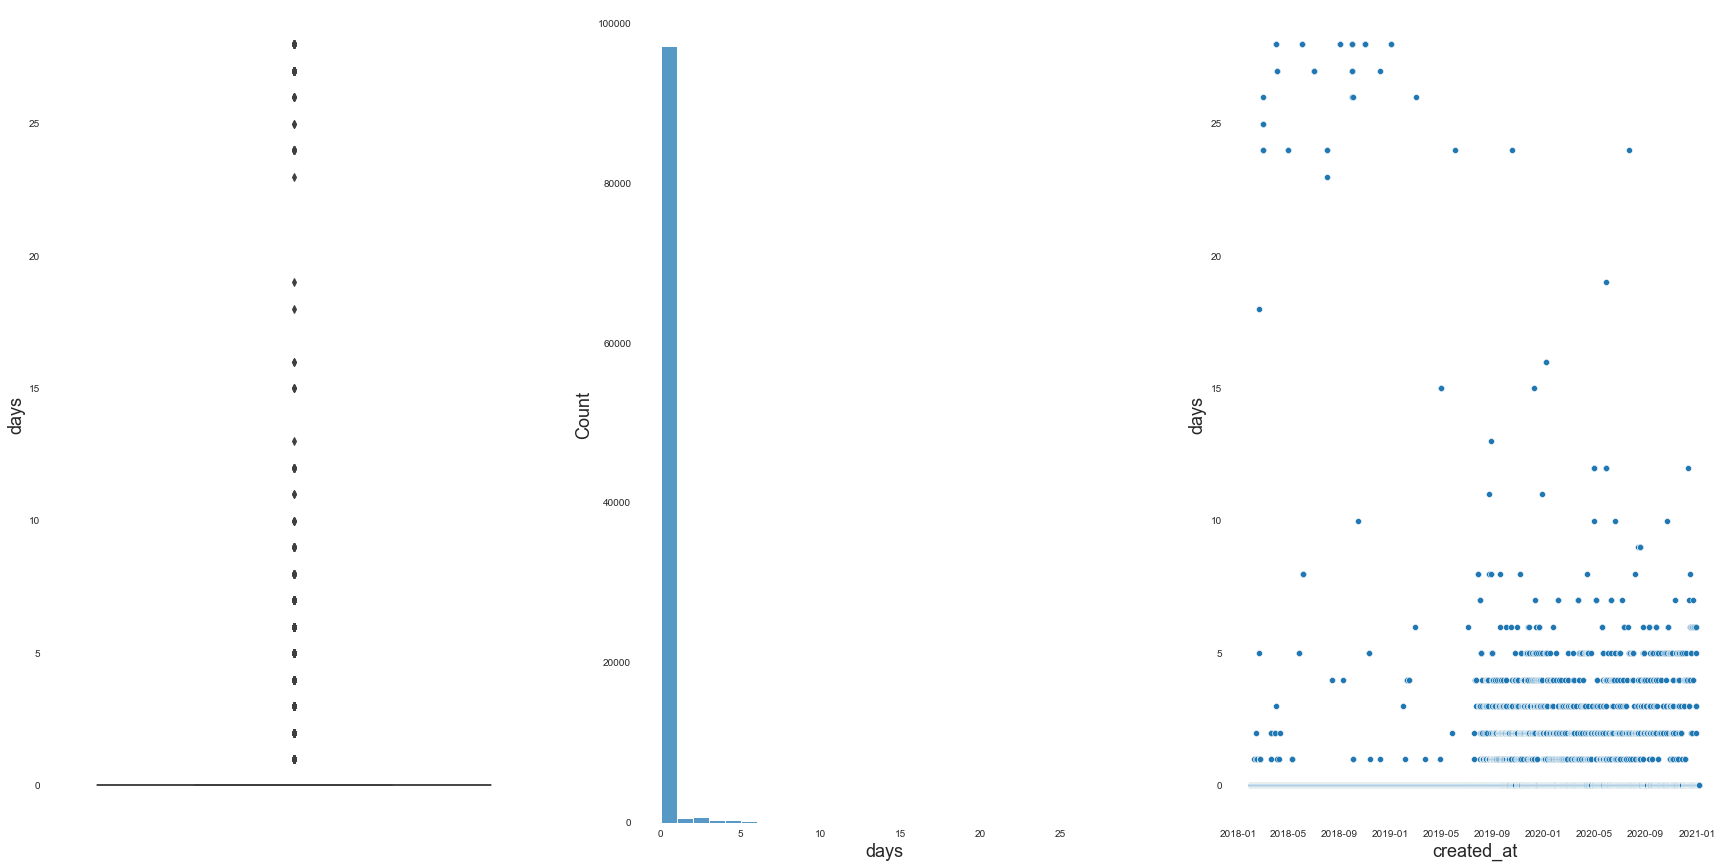

In [100]:
plot_results(marijuana_df)

In [101]:
#sns.violinplot(y = 'days', data = marijuana_df)

In [102]:
type_stats_df = calculate_stats(marijuana_df, type_stats_df, 'marijuana')
type_stats_df

,key,count,median,mean,min,Q1,Q2,Q3,IQR,max,kurtosis,skew
0,marijuana,99551,0.0,0.081827,0,0.0,0.0,0.0,0.0,28,658.557698,22.676957


# Intermediate Product

In [103]:
intermediate_product_df = valid_testing_times_df[valid_testing_times_df.type == 'intermediate_product']
intermediate_product_df

,index,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,type,foreign_matter,moisture_content_percent,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,microbial_status,microbial_editor,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_etoxazole_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotetramat_ppm,pesticide_spiroxamine_ppm,pesticide_tebuconazole_ppm,pesticide_thiacloprid_ppm,foreign_matter_stems,foreign_matter_seeds,test_for_terpenes,update_time,testing_time,days
0,741,WAJ413090.LRKM,2018-02-01 03:44:14,WAWA1.MMQP,WAWA1.USQN,4165100000002755.0,NaT,WAJ413090.INNZB,2018-02-02 04:00:20,passed,completed,WAJ413090.BA17I6,NaN,NaN,NaN,WAWA1.USQN,2018-02-01 03:43:00,intermediate_product,False,0.0,0.0,completed,NaN,25.70,NaN,40.23,NaN,0.0,NaN,0.00,NaN,0.14,NaN,NaN,0.0,NaN,NaN,NaN,completed,WAWA1.US1,0.0,0.0,NaN,completed,WAWA1.US1,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,62.89200,flower,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,1,-1 days +23:58:46,0
1,742,WAJ413090.LRKN,2018-02-01 03:44:14,WAWA1.MMQP,WAWA1.USQN,4165100000000100.0,NaT,WAJ413090.INNZD,2018-02-02 04:00:21,passed,completed,WAJ413090.BA17I9,NaN,NaN,NaN,WAWA1.USQN,20

In [104]:
#test_times_types_df['intermediate_product'] = valid_testing_times_df[valid_testing_times_df.type == 'intermediate_product']['days']

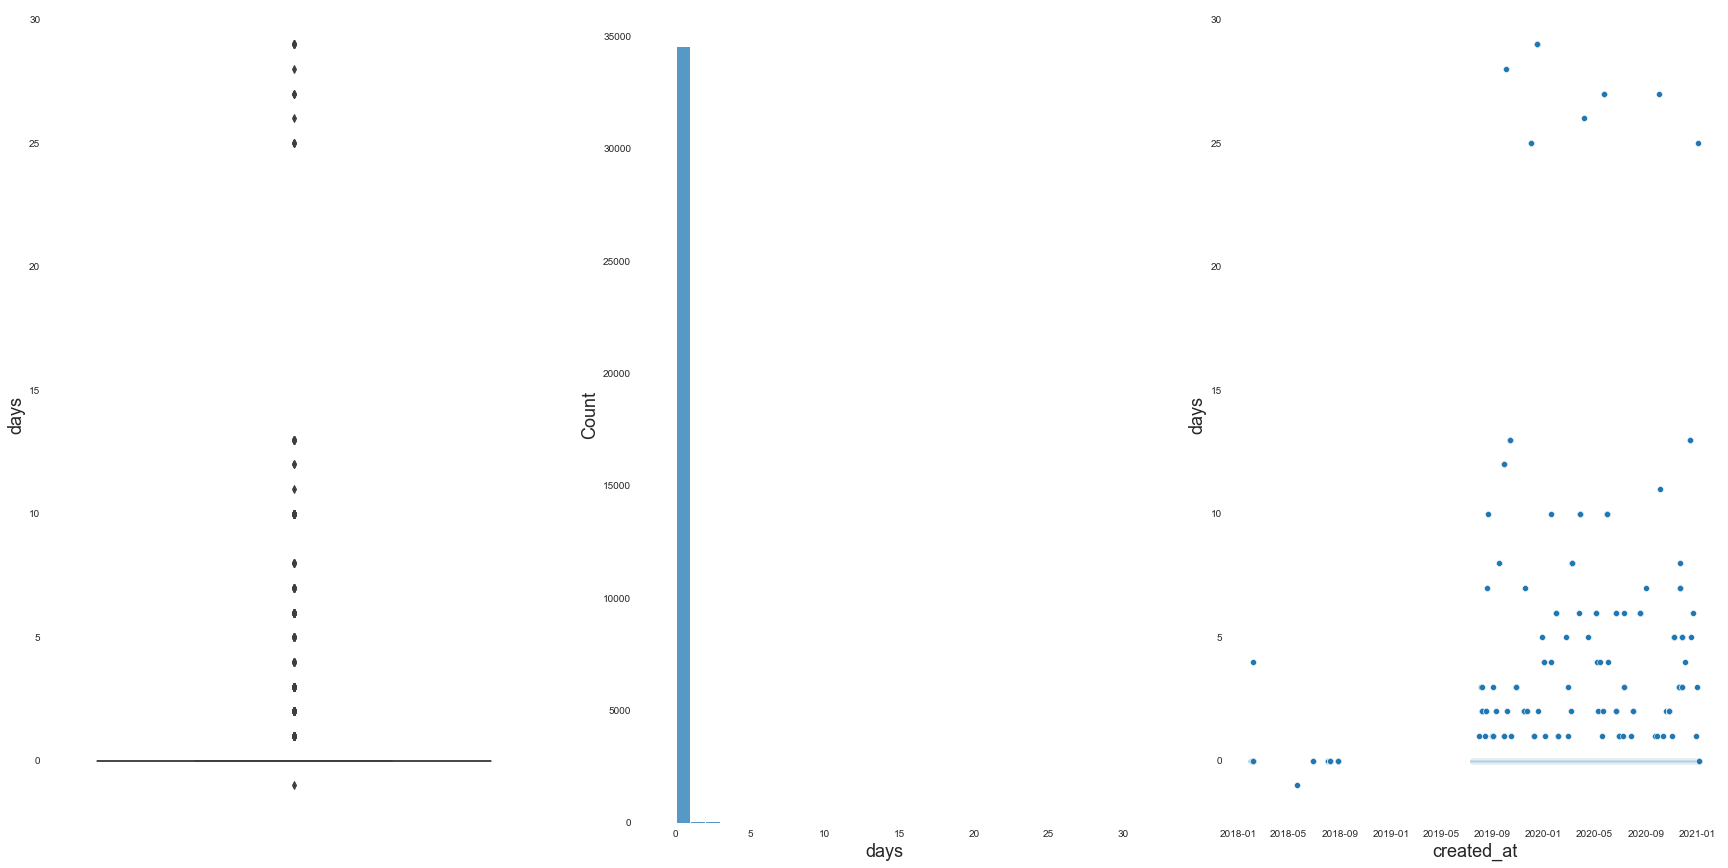

In [105]:
plot_results(intermediate_product_df)

In [106]:
type_stats_df = calculate_stats(intermediate_product_df, type_stats_df, 'intermediate_product')
type_stats_df

,key,count,median,mean,min,Q1,Q2,Q3,IQR,max,kurtosis,skew
0,marijuana,99551,0.0,0.081827,0,0.0,0.0,0.0,0.0,28,658.557698,22.676957
1,intermediate_product,34888,0.0,0.043339,-1,0.0,0.0,0.0,0.0,29,926.492648,27.598754


# Harvest Materials

In [107]:
harvest_materials_df = valid_testing_times_df[valid_testing_times_df.type == 'harvest_materials']
harvest_materials_df

,index,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,type,foreign_matter,moisture_content_percent,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,microbial_status,microbial_editor,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_etoxazole_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotetramat_ppm,pesticide_spiroxamine_ppm,pesticide_tebuconazole_ppm,pesticide_thiacloprid_ppm,foreign_matter_stems,foreign_matter_seeds,test_for_terpenes,update_time,testing_time,days
2,5689,WAJ416433.LR4E3,2018-02-01 10:17:11,WAWA1.MMZ1,WAWA1.US153,3404275296725261,NaT,WAJ416433.IN1R6C,2018-02-15 02:19:24,passed,completed,WAJ416433.BA28NS,NaN,NaN,NaN,WAWA1.US153,2018-02-01 10:17:00,harvest_materials,False,4.10,0.0,completed,1.0,20.14,NaN,1.24,NaN,0.0,NaN,0.0,NaN,0.00,NaN,NaN,0.0,NaN,NaN,NaN,completed,WAWA1.US1,0.0,0.0,0.0,completed,WAWA1.US1,0.0,0.0,completed,WAWA1.US1,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,18.90278,flower_lots,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,14,-1 days +23:59:49,0
3,5690,WAJ416433.LR4E4,2018-02-01 10:17:12,WAWA1.MMZ1,WAWA1.US153,1443362358794880,NaT,WAJ416433.IN1R6D,2018-02-01 10:17:12,passed,completed,WAJ416433.BA28NR,NaN,Na

In [108]:
#test_times_types_df['harvest_materials'] = valid_testing_times_df[valid_testing_times_df.type == 'harvest_materials']['days']

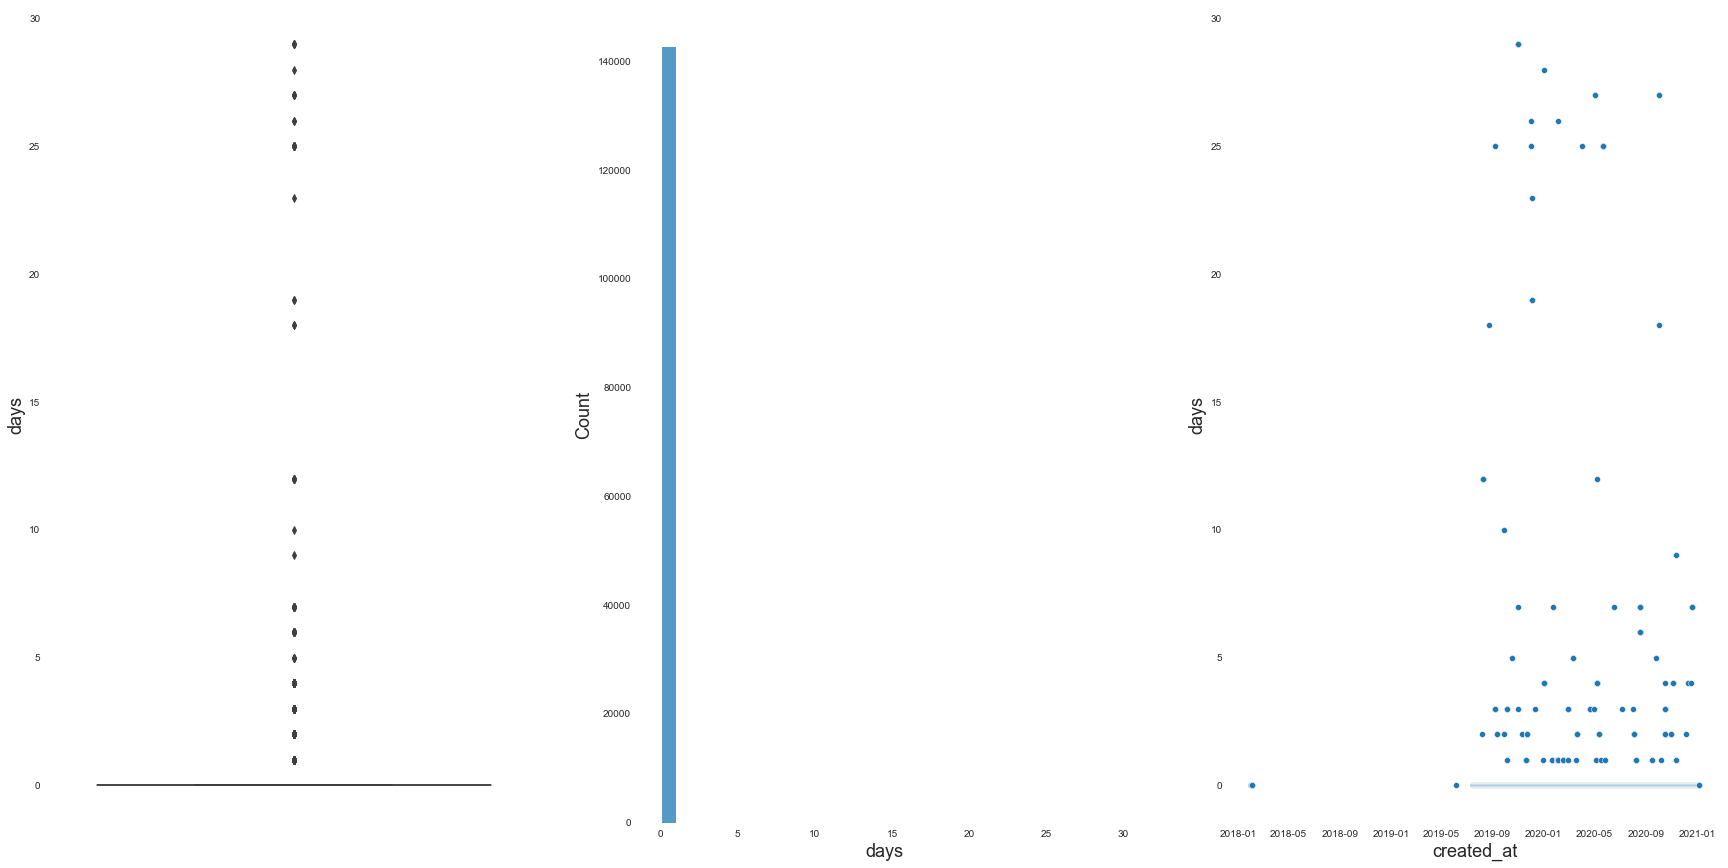

In [109]:
plot_results(harvest_materials_df)

In [110]:
type_stats_df = calculate_stats(harvest_materials_df, type_stats_df, 'harvest_materials')
type_stats_df

,key,count,median,mean,min,Q1,Q2,Q3,IQR,max,kurtosis,skew
0,marijuana,99551,0.0,0.081827,0,0.0,0.0,0.0,0.0,28,658.557698,22.676957
1,intermediate_product,34888,0.0,0.043339,-1,0.0,0.0,0.0,0.0,29,926.492648,27.598754
2,harvest_materials,143150,0.0,0.010143,0,0.0,0.0,0.0,0.0,29,3949.711382,59.261665


# End Product

In [111]:
end_product_df = valid_testing_times_df[valid_testing_times_df.type == 'end_product']
end_product_df

,index,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,type,foreign_matter,moisture_content_percent,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,microbial_status,microbial_editor,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_etoxazole_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotetramat_ppm,pesticide_spiroxamine_ppm,pesticide_tebuconazole_ppm,pesticide_thiacloprid_ppm,foreign_matter_stems,foreign_matter_seeds,test_for_terpenes,update_time,testing_time,days
89060,328474,WAM424980.LR71GC,2019-06-04 00:28:14,WAWA1.MMYZ,WAWA1.US2J4,NaN,NaT,WAM424980.IN3T7OZ,2019-06-04 00:28:16,passed,completed,WAM424980.BA4J3TG,NaN,NaN,NaN,WAWA1.US2J4,2019-06-04 10:16:00,end_product,False,0.0,NaN,completed,0.0,13.57,NaN,24.68,NaN,NaN,NaN,3.21,NaN,1.23,NaN,NaN,NaN,NaN,NaN,NaN,completed,NaN,0.0,0.0,0.0,completed,NaN,0.0,0.0,not_started,NaN,NaN,NaN,NaN,NaN,not_started,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_started,NaN,NaN,NaN,NaN,NaN,NaN,usable_marijuana,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,0,0 days 09:47:46,0
92796,343400,WAATTESTE.LR7CYY,2019-07-14 20:21:05,WAWA1.MM26M,WAWA1.US3V9,Lab Results Attested Fix,NaT,WAATTESTE.INBN07Q,2019-07-14 20:21:05,passed,completed,WAJ412252.BA1CO,Na

In [112]:
#test_times_types_df['end_product'] = valid_testing_times_df[valid_testing_times_df.type == 'end_product']['days']

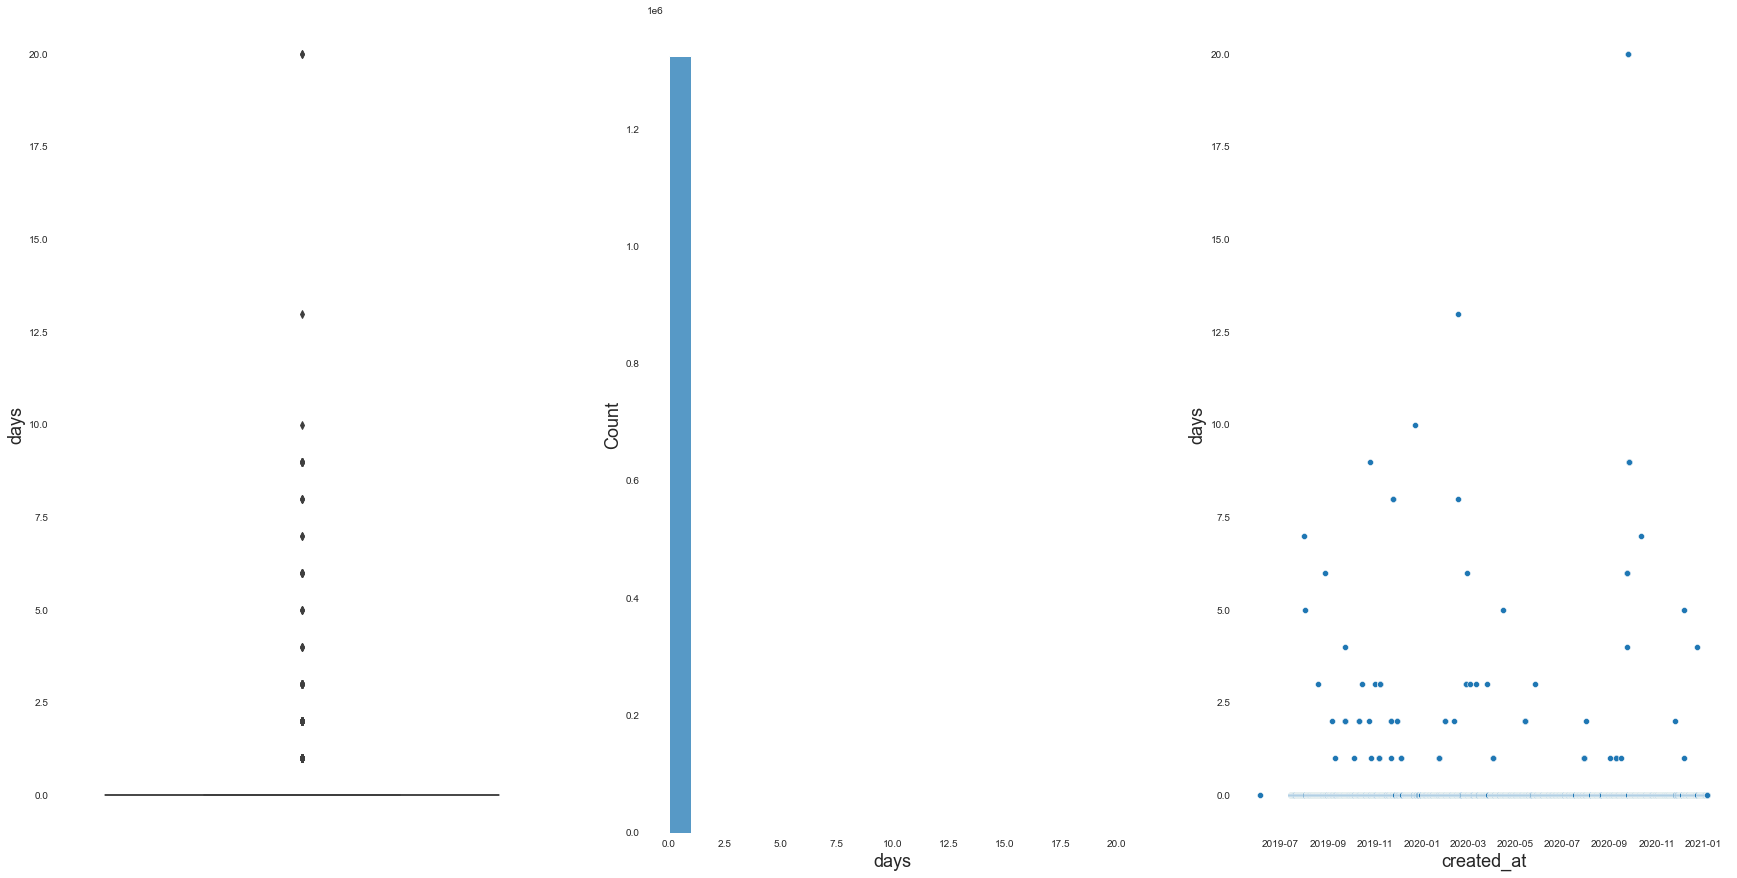

In [113]:
plot_results(end_product_df)

# Comparison

In [114]:
type_stats_df = calculate_stats(end_product_df, type_stats_df, 'end_product')
type_stats_df

,key,count,median,mean,min,Q1,Q2,Q3,IQR,max,kurtosis,skew
0,marijuana,99551,0.0,0.081827,0,0.0,0.0,0.0,0.0,28,658.557698,22.676957
1,intermediate_product,34888,0.0,0.043339,-1,0.0,0.0,0.0,0.0,29,926.492648,27.598754
2,harvest_materials,143150,0.0,0.010143,0,0.0,0.0,0.0,0.0,29,3949.711382,59.261665
3,end_product,1325276,0.0,0.000285,0,0.0,0.0,0.0,0.0,20,81559.190755,250.739834


In [115]:
#type_stats_df = stats_df[(stats_df.key == 'marijuana') | (stats_df.key == 'intermediate_product') | (stats_df.key == 'harvest_materials') | (stats_df.key == 'end_product')]
#type_stats_df

In [116]:
#type_stats_df.plot(x='key', y = ['median', 'Q1', 'Q2', 'Q3', 'IQR'], kind = 'bar', figsize = (15,15), xlabel = 'Product Type');

In [117]:
#sns.catplot()

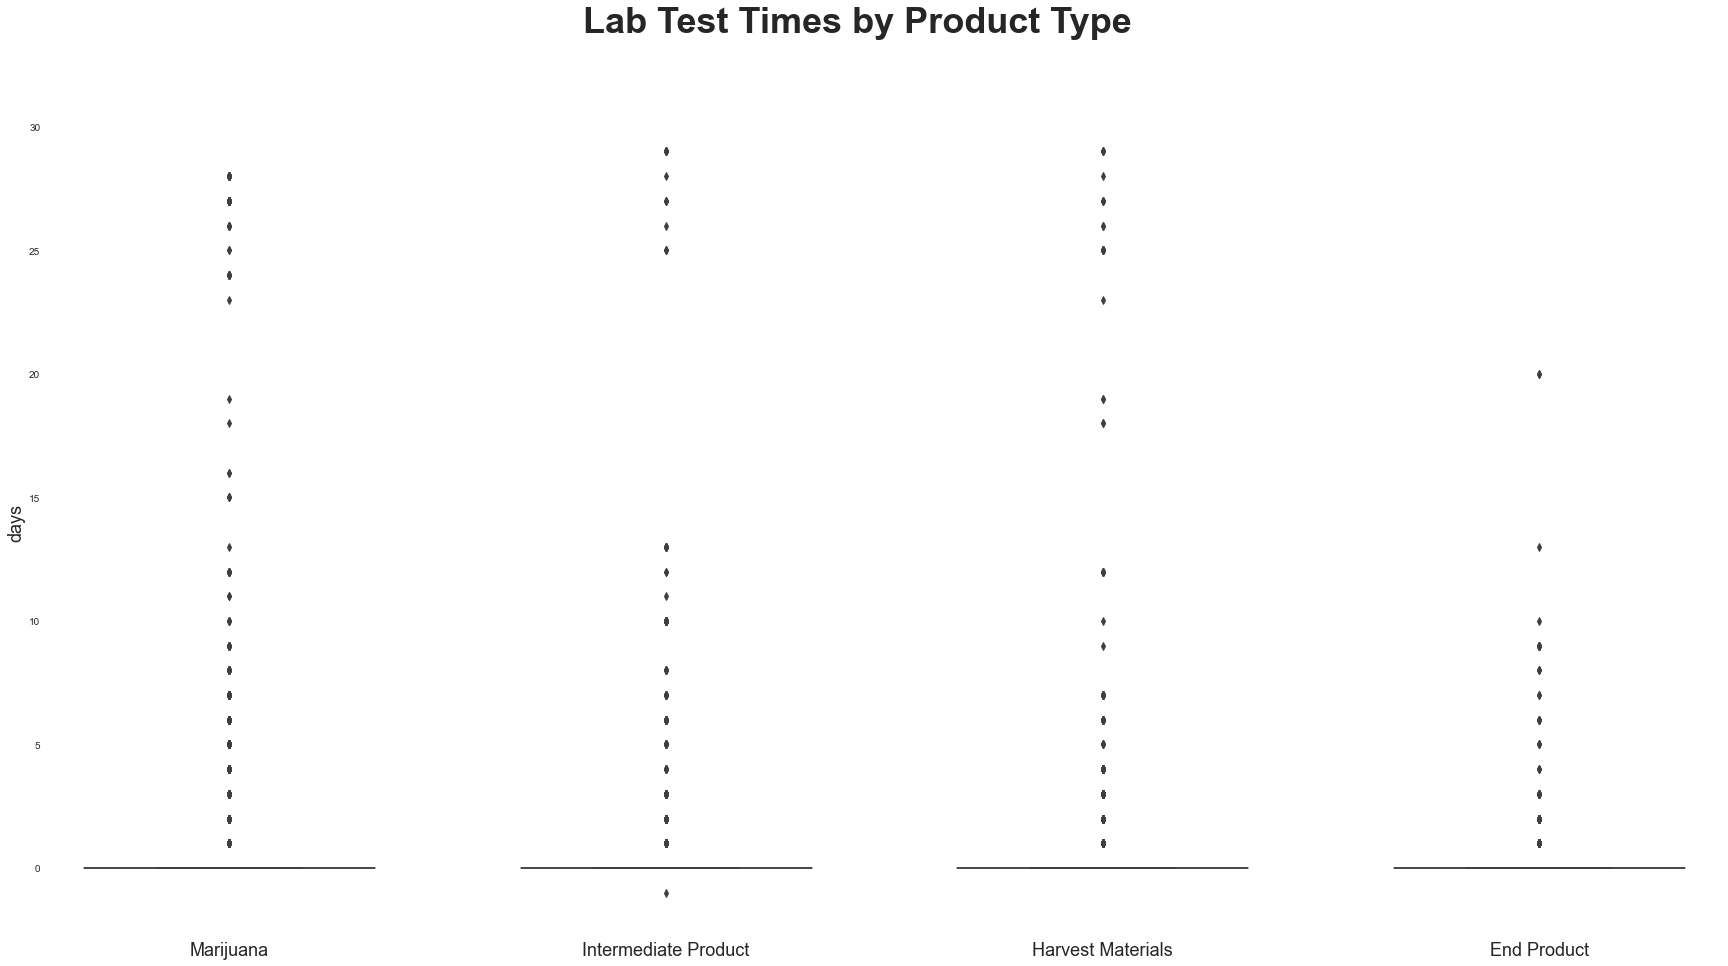

In [118]:
sns.set_style('white')

fig, axes = plt.subplots(ncols=4, figsize=(30,15), sharey=True);
plt.suptitle(t = "Lab Test Times by Product Type", fontsize=36, fontweight = 'heavy')
plt.rc('axes', labelsize=18)

a0 = axes[0]
a0.set(xlabel = 'Marijuana')
marijuana_boxplot = sns.boxplot(y = 'days', data=marijuana_df, ax = a0);

a1 = axes[1]
a1.set(xlabel='Intermediate Product')
ip_boxplot =sns.boxplot(y = 'days', data=intermediate_product_df, ax = a1);
ip_boxplot.set(ylabel=None)

a2 = axes[2]
a2.set(xlabel='Harvest Materials')
harvest_boxplot = sns.boxplot(y = 'days', data=harvest_materials_df, ax = a2);
harvest_boxplot.set(ylabel=None)

a3 = axes[3]
a3.set(xlabel='End Product')
end_boxplot = sns.boxplot(y = 'days', data=end_product_df, ax = a3);
end_boxplot.set(ylabel=None)

sns.despine(left=True, right=True, top=True, bottom=True)

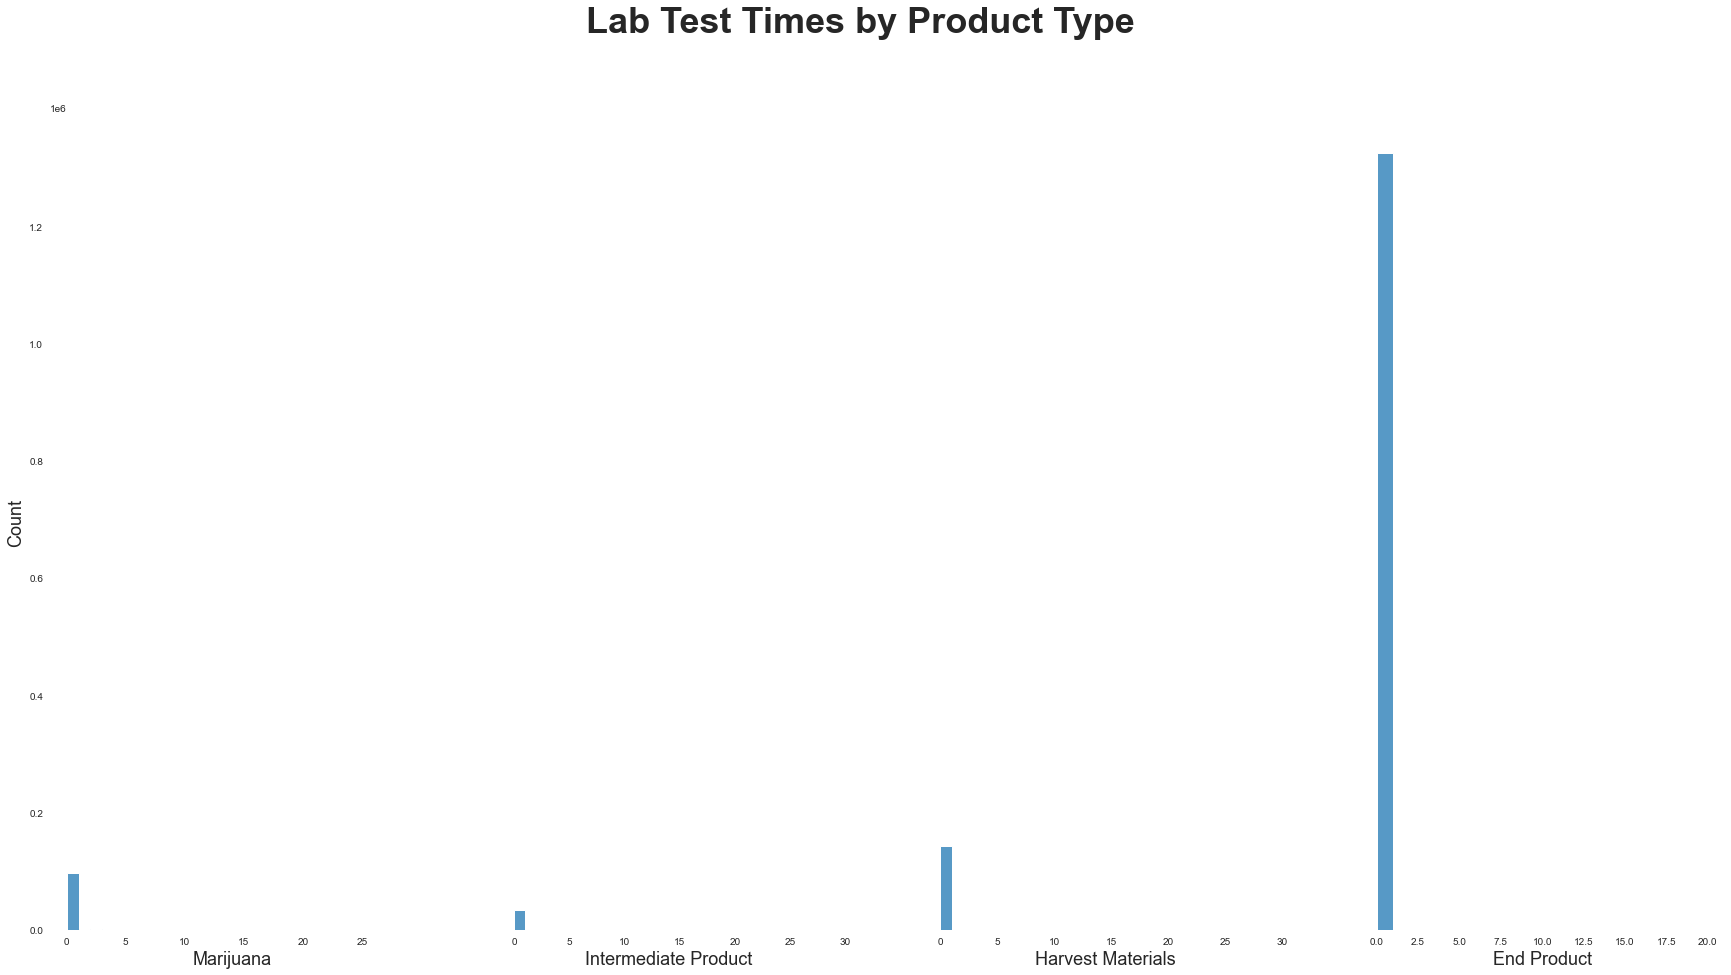

In [119]:
sns.set_style('white')

fig, axes = plt.subplots(ncols=4, figsize=(30,15), sharey=True);
plt.suptitle(t = "Lab Test Times by Product Type", fontsize=36, fontweight = 'heavy')
plt.rc('axes', labelsize=18)

a0 = axes[0]
a0.set(xlabel = 'Marijuana')
mh = sns.histplot(data = marijuana_df.days, binwidth=1, ax = a0);
mh.set(ylabel='Count')

a1 = axes[1]
a1.set(xlabel='Intermediate Product')
iph = sns.histplot(data = intermediate_product_df.days, binwidth=1, ax = a1);
iph.set(ylabel=None)

a2 = axes[2]
a2.set(xlabel='Harvest Materials')
hmh = sns.histplot(data = harvest_materials_df.days, binwidth=1, ax = a2);
hmh.set(ylabel=None)

a3 = axes[3]
a3.set(xlabel='End Product')
eph = sns.histplot(data = end_product_df.days, binwidth=1, ax = a3);
eph.set(ylabel=None)

sns.despine(left=True, right=True, top=True, bottom=True)

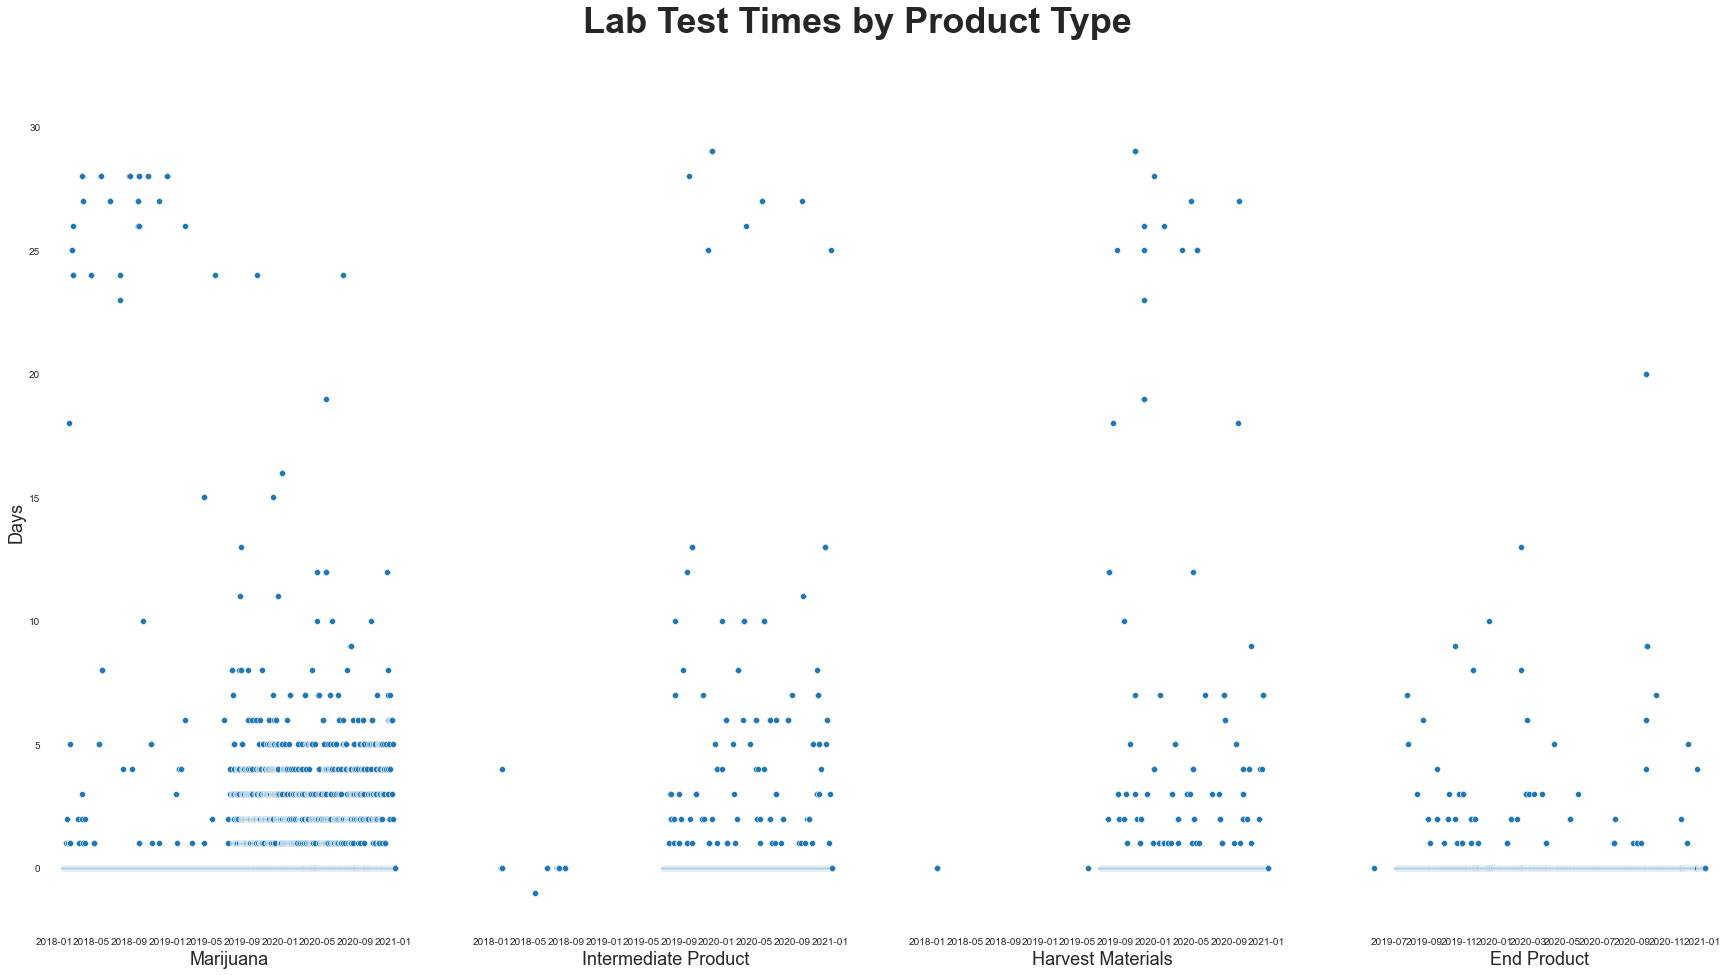

In [120]:
sns.set_style('white')

fig, axes = plt.subplots(ncols=4, figsize=(30,15), sharey=True);
plt.suptitle(t = "Lab Test Times by Product Type", fontsize=36, fontweight = 'heavy')
plt.rc('axes', labelsize=18)

a0 = axes[0]
a0.set(xlabel = 'Marijuana')
ms = sns.scatterplot(data = marijuana_df, x = 'created_at', y = "days", ax = a0);
ms.set(ylabel='Days')

a1 = axes[1]
a1.set(xlabel = 'Intermediate Product')
ips = sns.scatterplot(data = intermediate_product_df, x = 'created_at', y = "days", ax = a1);
ips.set(ylabel='Days')

a2 = axes[2]
a2.set(xlabel='Harvest Materials')
hms = sns.scatterplot(data = harvest_materials_df, x = 'created_at', y = "days", ax = a2);
hms.set(ylabel=None)

a3 = axes[3]
a3.set(xlabel='End Product')
eps = sns.scatterplot(data = end_product_df, x = 'created_at', y = "days", ax = a3);
eps.set(ylabel=None)

sns.despine(left=True, right=True, top=True, bottom=True)